# Factor analyses


In this notebook we analyse the results of the performed ablation study to identify the factors used by the CNN model to discriminate between cells of the different overexpression and the control condition.

---


## Environmental setup

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sys.path.append("../../../../")

from src.utils.notebooks.images.exp_evaluation import LogAnalyzer
from src.utils.basic.io import get_file_list

mpl.rcParams["figure.dpi"] = 600

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def get_factor_analyses_results(log_files):
    result = {
        "model": [],
        "fold": [],
        "train_acc": [],
        "val_acc": [],
        "test_acc": [],
        "train_bacc": [],
        "val_bacc": [],
        "test_bacc": [],
    }

    for file in log_files:
        dirs = file.split("/")
        model = dirs[-3]
        fold = dirs[-2]

        la = LogAnalyzer(file)
        la.analyze()

        result["model"].append(model)
        result["fold"].append(fold)
        result["train_acc"].append(la.best_train_acc)
        result["train_bacc"].append(la.best_train_bacc)
        result["val_acc"].append(la.best_val_acc)
        result["val_bacc"].append(la.best_val_bacc)
        result["test_acc"].append(la.test_acc)
        result["test_bacc"].append(la.test_bacc)
    return pd.DataFrame(result)

<IPython.core.display.Javascript object>

---

## Read in data

In [3]:
root_dir = "../../../../data/experiments/rohban/images/factor_analyses/"
all_log_files = get_file_list(root_dir, file_type_filter=".log")

<IPython.core.display.Javascript object>

In [4]:
results = get_factor_analyses_results(all_log_files)
results.head()

,model,fold,train_acc,val_acc,test_acc,train_bacc,val_bacc,test_bacc
0,all_resnet_bin_nuc,fold_0,0.049938,0.043793,0.043208,0.058641,0.048957,0.046728
1,all_resnet_bin_nuc,fold_1,0.050538,0.041480,0.041951,0.054910,0.047688,0.046938
2,all_resnet_bin_nuc,fold_2,0.050170,0.042813,0.040142,0.055862,0.047671,0.044757
3,all_resnet_bin_nuc,fold_3,0.049305,0.042417,0.043053,0.057475,0.048879,0.047732
4,all_resnet_bin_nuc_bin_region,fold_0,0.195444,0.112457,0.119318,0.241547,0.131811,0.134859


<IPython.core.display.Javascript object>

In [19]:
input_dict = {
    "all_resnet_bin_nuc": "binarized nuclei",
    "all_resnet_nuc": "nuclei",
    "all_resnet_region": "region",
    "all_resnet_bin_region": "binarized region",
    "all_resnet_bin_nuc_region": "binarized nuclei and region",
    "all_resnet_bin_nuc_bin_region": "binarized nuclei and\nbinarized region",
    "all_resnet_nuc_bin_region": "nuclei and binarized region",
    "all_resnet_nuc_region": "nuclei and region",
}
results["input"] = results.model.map(input_dict)

<IPython.core.display.Javascript object>

---
## Visualization

<ipython-input-20-cfa1c35a4dd0>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=list(results.groupby("input").mean().sort_values("test_bacc").index),


Text(0, 0.5, '')

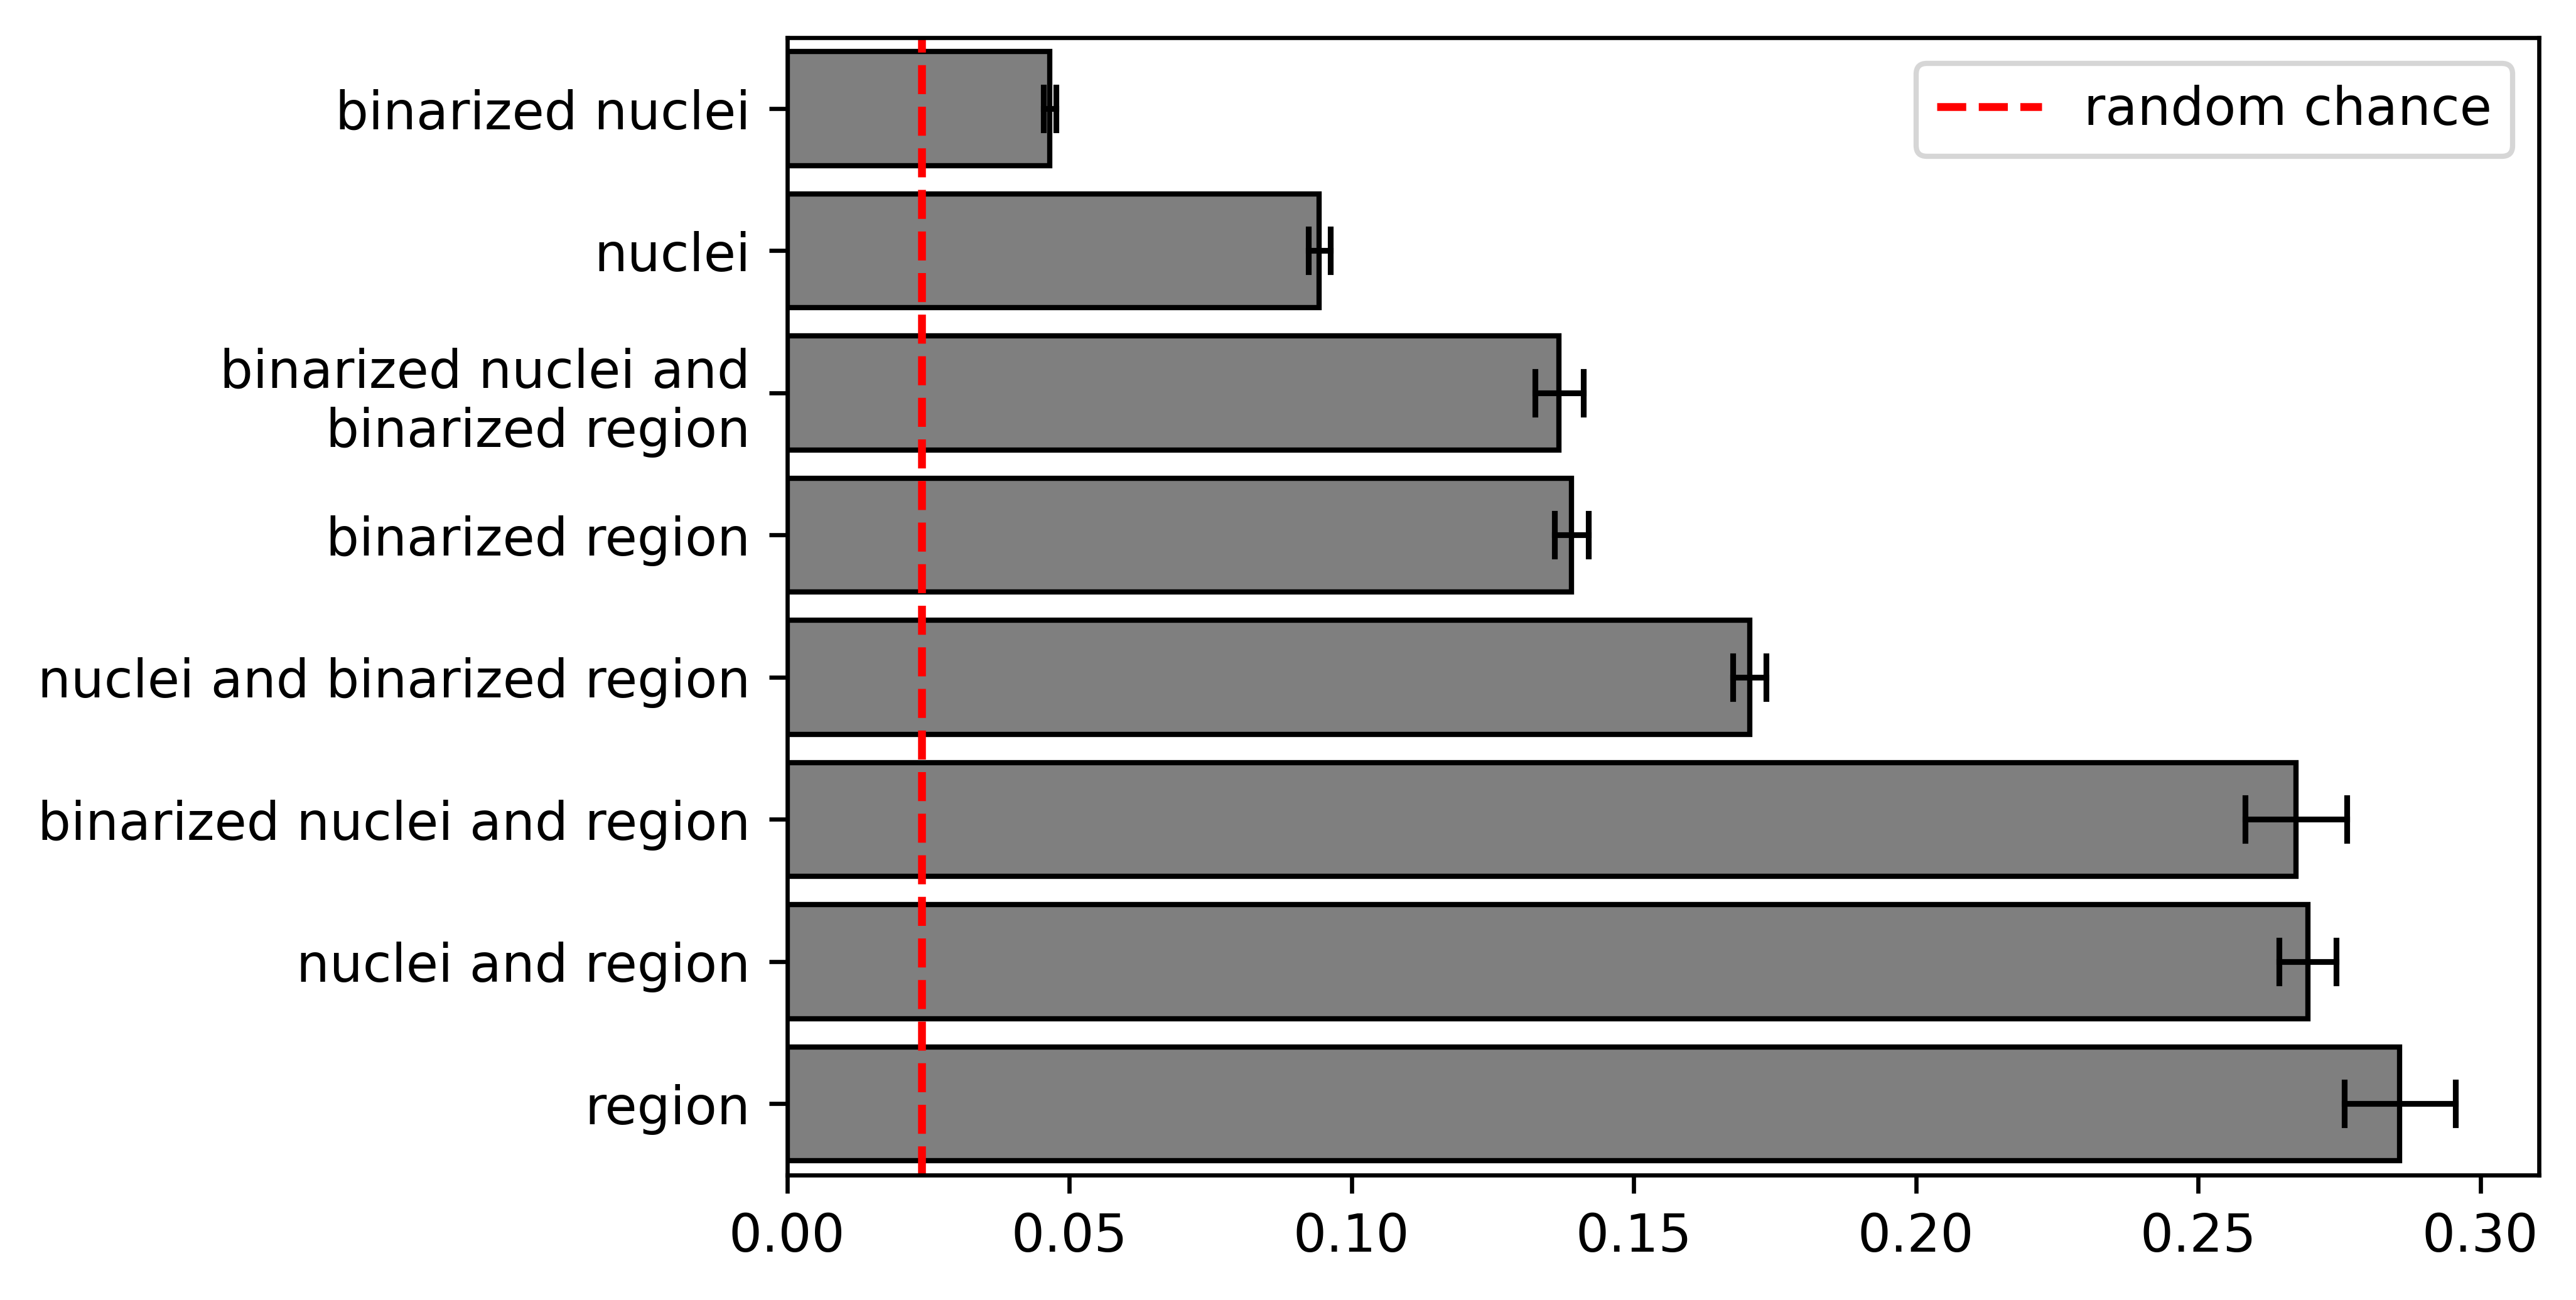

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots(figsize=[6, 4])
ax = sns.barplot(
    data=results,
    y="input",
    x="test_bacc",
    ci="sd",
    capsize=0.3,
    errcolor="k",
    edgecolor="k",
    errwidth=1.1,
    palette=["tab:gray"],
    order=list(results.groupby("input").mean().sort_values("test_bacc").index),
)
ax.axvline(x=1 / 42, c="r", linestyle="--", label="random chance")
ax.legend()
ax.set_xlabel("")
ax.set_ylabel("")

<ipython-input-22-6b933d0c8949>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results.loc[


Text(0, 0.5, '')

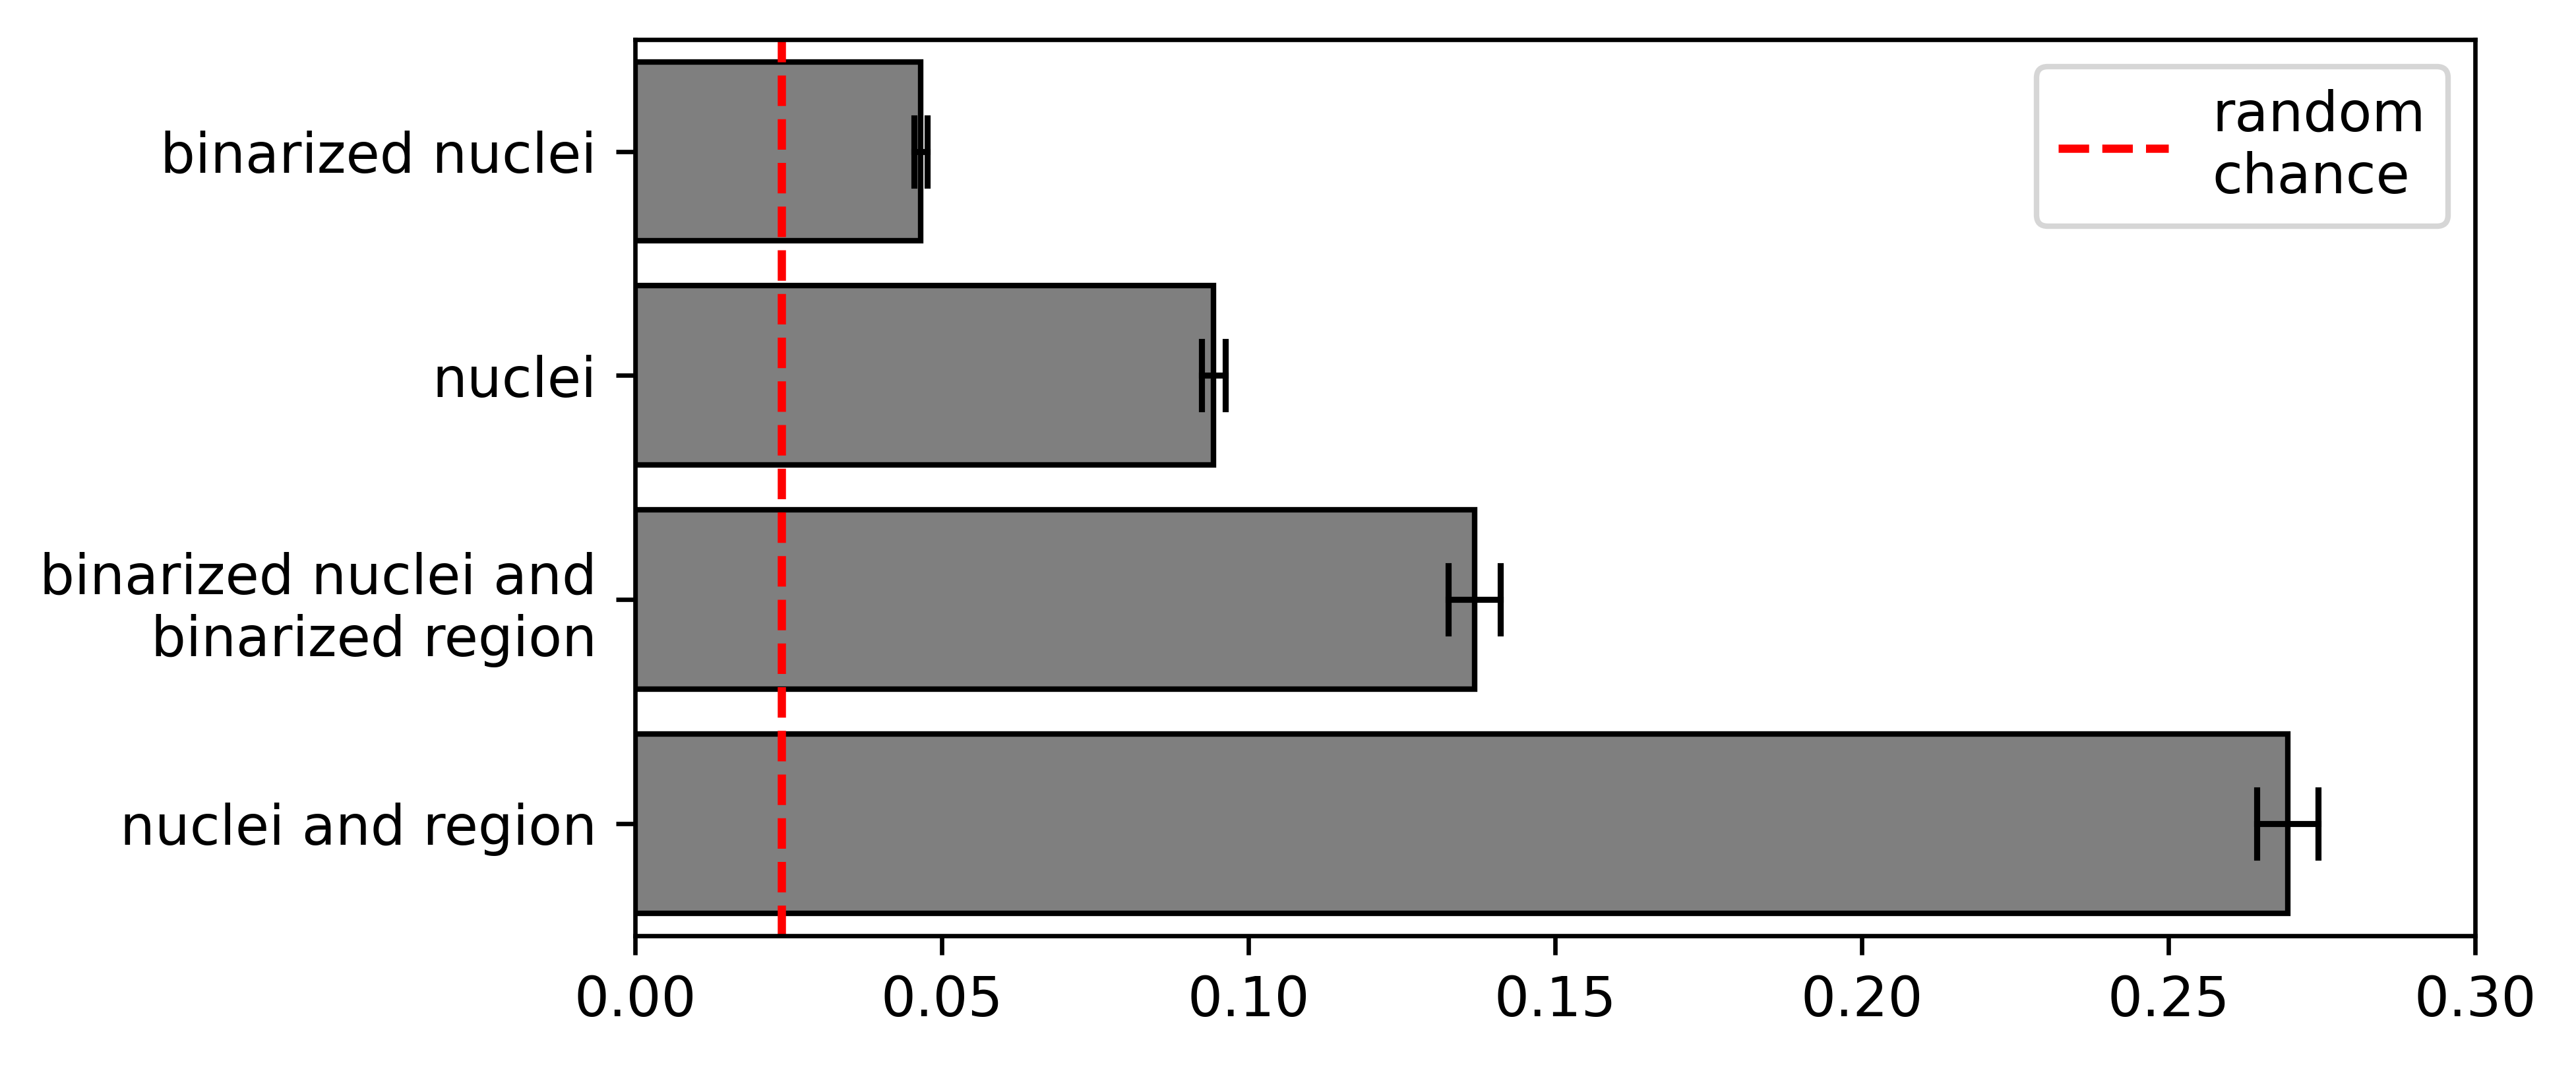

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(figsize=[6, 3])
ax = sns.barplot(
    data=results.loc[
        ~results.input.isin(
            [
                "region",
                "binarized region",
                "binarized nuclei and region",
                "nuclei and binarized region",
            ]
        )
    ],
    y="input",
    x="test_bacc",
    ci="sd",
    capsize=0.3,
    errcolor="k",
    edgecolor="k",
    errwidth=1.1,
    palette=["tab:gray"],
    order=list(
        results.loc[
            ~results.input.isin(
                [
                    "region",
                    "binarized region",
                    "binarized nuclei and region",
                    "nuclei and binarized region",
                ]
            )
        ]
        .groupby("input")
        .mean()
        .sort_values("test_bacc")
        .index
    ),
)
ax.axvline(x=1 / 42, c="r", linestyle="--", label="random\nchance")
ax.legend()
ax.set_xlim([0, 0.3])
ax.set_xlabel("")
ax.set_ylabel("")

In [8]:
results.groupby("input").test_bacc.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
input,,,,,,,,
binarized nuclei,4.0,0.046539,0.001264,0.044757,0.046235,0.046833,0.047137,0.047732
nuclei,4.0,0.094302,0.002237,0.092589,0.093104,0.093520,0.094718,0.097579
binarized nuclei and binarized region,4.0,0.136793,0.004921,0.131435,0.134003,0.136346,0.139136,0.143048
binarized region,4.0,0.139003,0.003466,0.136216,0.137370,0.137865,0.139498,0.144068
nuclei and binarized region,4.0,0.170516,0.003461,0.166779,0.167971,0.170832,0.173377,0.173621
binarized nuclei and region,4.0,0.267296,0.010400,0.252216,0.264849,0.270693,0.273139,0.275581
nuclei and region,4.0,0.269400,0.005793,0.263329,0.265337,0.269100,0.273163,0.276071
region,4.0,0.285734,0.011349,0.275269,0.280402,0.282909,0.288241,0.301848


<IPython.core.display.Javascript object>